In [1]:
import pandas as pd 
import numpy as np

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline 
from sklearn.impute import SimpleImputer
#from df_after_transform import df_after_transform
from sklearn.model_selection import KFold, cross_validate, GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV 
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import set_config
set_config(display="diagram")  

pd.set_option('display.max_colwidth', 1000, 'display.max_rows', 50, 'display.max_columns', None)

In [2]:
merged = pd.read_csv('inputs/merged.csv')

In [3]:
merged

,Year,Period,Label,SP500_Return,Percent_Change_in_GDP,CPI,Construction_Unemployment_Rate,Manufacturing_Unemployment_Rate,Finance_Unemployment_Rate
0,2005,Q01,2005 Qtr1,-0.0259,4.5,192.366667,11.4,5.3,2.6
1,2005,Q02,2005 Qtr2,0.0091,2.0,193.666667,6.4,4.6,3.2
2,2005,Q03,2005 Qtr3,0.0315,3.2,196.600000,5.6,4.9,3.2
3,2005,Q04,2005 Qtr4,0.0159,2.3,198.433333,6.4,4.8,2.5
4,2006,Q01,2006 Qtr1,0.0373,5.5,199.466667,8.7,4.5,2.6
...,...,...,...,...,...,...,...,...,...
67,2021,Q04,2021 Qtr4,0.1040,7.0,278.706667,4.6,3.1,2.2
68,2022,Q01,2022 Qtr1,-0.0518,-1.6,284.893667,6.6,3.3,2.1
69,2022,Q02,2022 Qtr2,-0.1663,-0.6,291.535667,4.0,3.0,1.5
70,2022,Q03,2022 Qtr3,-0.0517,3.2,295.495667,3.6,3.1,1.2


In [4]:
#preprop: splitting into training and test: 

recession_df = pd.read_csv('inputs/merged.csv')
recession_df 

X = recession_df[['SP500_Return', 'Percent_Change_in_GDP', 'CPI']]
y = recession_df['Finance_Unemployment_Rate'] 

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3)


In [5]:
# ML for finance, using 70% as train and .3 as test   
model = LinearRegression()
model.fit(X_train,y_train)

predictions = model.predict(X_test)
predictions 

array([4.23462053, 2.03203352, 3.56265802, 2.82399809, 2.75769579,
       1.71788162, 2.81468674, 1.74054055, 3.64235962, 3.65124343,
       4.06579321, 2.48477861, 2.06935885, 3.95091751, 3.92898182,
       3.55001235, 4.18510023, 2.95249526, 3.50231936, 4.35215214,
       3.35688709, 3.61658619])

# ML using just the regressions: 

In [6]:
# ML for construction, working data using linear regression: 

X = recession_df[['SP500_Return', 'Percent_Change_in_GDP', 'CPI']]
y = recession_df['Construction_Unemployment_Rate']

model = LinearRegression()
model.fit(X,y)

predictions = model.predict(X) 
recession_df['Predicted_Construction_Unemployment_Rate'] = predictions
#recession_df = recession_df.drop('Predicted_Finance_Unemployment_Rate', axis=1)



In [7]:
# ML for manuf, working data using linear regression: 

X = recession_df[['SP500_Return', 'Percent_Change_in_GDP', 'CPI']]
y = recession_df['Manufacturing_Unemployment_Rate']

model = LinearRegression()
model.fit(X,y)

predictions = model.predict(X) 
recession_df['Predicted_Manufacturing_Unemployment_Rate'] = predictions
#recession_df = recession_df.drop('Predicted_Finance_Unemployment_Rate', axis=1)



In [8]:
# ML for finance, working data using linear regression: 

X = recession_df[['SP500_Return', 'Percent_Change_in_GDP', 'CPI']]
y = recession_df['Finance_Unemployment_Rate']

model = LinearRegression()
model.fit(X,y)

predictions = model.predict(X) 
recession_df['Predicted_Finance_Unemployment_Rate'] = predictions
recession_df

,Year,Period,Label,SP500_Return,Percent_Change_in_GDP,CPI,Construction_Unemployment_Rate,Manufacturing_Unemployment_Rate,Finance_Unemployment_Rate,Predicted_Construction_Unemployment_Rate,Predicted_Manufacturing_Unemployment_Rate,Predicted_Finance_Unemployment_Rate
0,2005,Q01,2005 Qtr1,-0.0259,4.5,192.366667,11.4,5.3,2.6,12.571252,6.929802,4.630763
1,2005,Q02,2005 Qtr2,0.0091,2.0,193.666667,6.4,4.6,3.2,13.026053,7.320820,4.696322
2,2005,Q03,2005 Qtr3,0.0315,3.2,196.600000,5.6,4.9,3.2,12.820924,7.266847,4.622378
3,2005,Q04,2005 Qtr4,0.0159,2.3,198.433333,6.4,4.8,2.5,12.632145,7.146438,4.559514
4,2006,Q01,2006 Qtr1,0.0373,5.5,199.466667,8.7,4.5,2.6,12.361589,7.010912,4.502573
...,...,...,...,...,...,...,...,...,...,...,...,...
67,2021,Q04,2021 Qtr4,0.1040,7.0,278.706667,4.6,3.1,2.2,5.819398,4.046022,2.219427
68,2022,Q01,2022 Qtr1,-0.0518,-1.6,284.893667,6.6,3.3,2.1,4.950306,3.323162,1.945694
69,2022,Q02,2022 Qtr2,-0.1663,-0.6,291.535667,4.0,3.0,1.5,3.311401,2.139439,1.542854
70,2022,Q03,2022 Qtr3,-0.0517,3.2,295.495667,3.6,3.1,1.2,3.488665,2.508093,1.538445


In [9]:
#R2 

r2_con = r2_score(recession_df['Construction_Unemployment_Rate'], recession_df['Predicted_Construction_Unemployment_Rate'])
r2_manuf = r2_score(recession_df['Manufacturing_Unemployment_Rate'], recession_df['Predicted_Manufacturing_Unemployment_Rate'])
r2_fin = r2_score(recession_df['Finance_Unemployment_Rate'], recession_df['Predicted_Finance_Unemployment_Rate'])

print('R2 Score Construction:', r2_con) 
print('R2 Score Manufacturing:', r2_manuf)
print('R2 Score Finance:', r2_fin)  



R2 Score Construction: 0.2085356845004972
R2 Score Manufacturing: 0.22290384238480065
R2 Score Finance: 0.22360609989705182


In [10]:
data = {'Industry': ['Construction', 'Manuf', 'Fin'],
        'R2': [r2_con, r2_manuf, r2_fin]}

reg_df = pd.DataFrame(data)
reg_df


,Industry,R2
0,Construction,0.208536
1,Manuf,0.222904
2,Fin,0.223606


# Better Machine Learning: 

- The ML above is just fitting the predictions along the line of best fit. This is not ideal and doesnt tell us much! 
- Below we use pipelines based on the different variables 

## Construction

In [11]:
#Construction - Train and test on part of dataset to get r2 score

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import GridSearchCV
from sklearn import metrics


X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    merged.drop('Construction_Unemployment_Rate', axis=1),
    merged['Construction_Unemployment_Rate'],
    test_size=0.3,
    stratify=merged['Year']
) 

num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
]) 

#Preprocessor
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, ['SP500_Return', 'Percent_Change_in_GDP', 'CPI']),
    ('cat', cat_transformer, ['Year', 'Period'])
]) 

#Define the model as a pipeline of the preprocessor/linear regression model
model_c = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
]) 

#Train on training data
model_c.fit(X_train_c, y_train_c)

# Predict on the testing data
y_pred_c = model_c.predict(X_test_c)

# Evaluate the model
score_c = model_c.score(X_test_c, y_test_c)
print(f'R^2 score: {score_c}') 

print(y_pred_c)
len(X_train_c)




R^2 score: 0.7706211795672825
[11.60597899  6.21628369  6.27888474  8.72205881  9.52042075  9.13791033
 20.96204382  4.98495922  8.29159827  9.42732759 10.79024813  5.48700813
  7.28707827  6.90938999  5.64666062 20.64699461  5.80266176  5.43627967
  4.65859503 12.22454129  9.98855865 12.9457098 ]


50

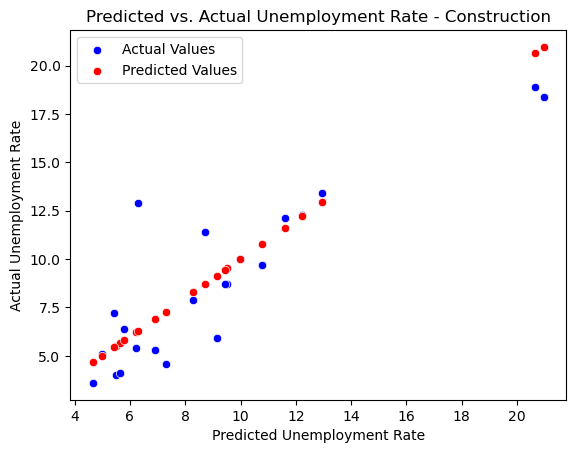

In [12]:
sns.scatterplot(x=y_pred_c, y=y_test_c, color='blue', label='Actual Values')
sns.scatterplot(x=y_pred_c, y=y_pred_c, color='red', label='Predicted Values')
plt.title("Predicted vs. Actual Unemployment Rate - Construction")
plt.xlabel("Predicted Unemployment Rate")
plt.ylabel("Actual Unemployment Rate")
plt.legend()
plt.show()

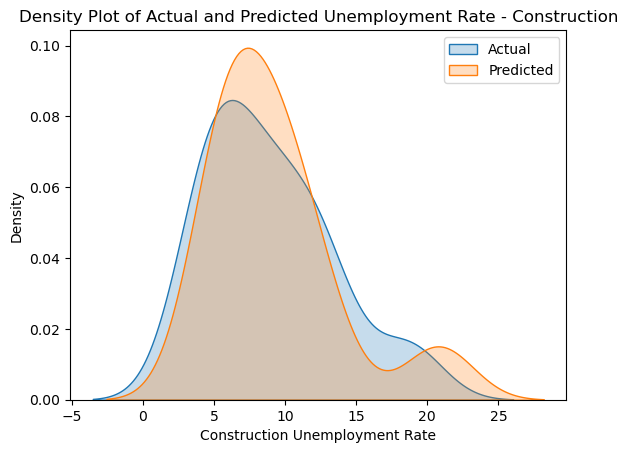

In [13]:
#DataFrame of actual and predicted values
results_c = pd.DataFrame({'Actual': y_test_c, 'Predicted': y_pred_c})

#Density plot:
sns.kdeplot(data=results_c, x='Actual', label='Actual', shade=True)
sns.kdeplot(data=results_c, x='Predicted', label='Predicted', shade=True)
plt.xlabel('Construction Unemployment Rate')
plt.title('Density Plot of Actual and Predicted Unemployment Rate - Construction')
plt.legend()
plt.show()

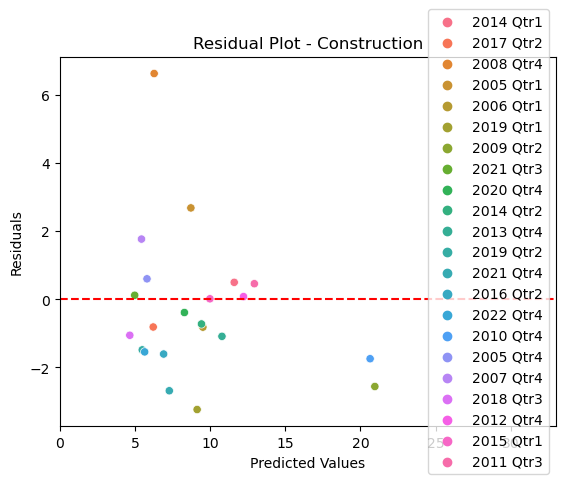

In [14]:
#Residual plot:
residuals_c = y_test_c - y_pred_c
sns.scatterplot(x=y_pred_c, y=residuals_c, hue=X_test_c['Label'])
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot - Construction')
plt.legend(loc='center right')
plt.xlim([0, 33])
plt.show()

## Manufacturing

In [15]:
#Manufacturing - Train and test on part of dataset to get r2 score

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(
    merged.drop('Manufacturing_Unemployment_Rate', axis=1),
    merged['Manufacturing_Unemployment_Rate'],
    test_size=0.3,
    stratify=merged['Year']
) 


num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
]) 

preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, ['SP500_Return', 'Percent_Change_in_GDP', 'CPI']),
    ('cat', cat_transformer, ['Year', 'Period'])
]) 

# Define the model as a pipeline of the preprocessor and a linear regression model
model_m = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
]) 

# Train the model on the training data
model_m.fit(X_train_m, y_train_m)

# Predict on the testing data
y_pred_m = model_m.predict(X_test_m)

# Evaluate the model
score_m = model_m.score(X_test_m, y_test_m)
print(f'R^2 score: {score_m}') 

print(y_pred_m)
len(X_train_m) 

R^2 score: 0.8465565089628306
[ 3.87067695  6.73767938  4.03482548  4.62739814  4.77773653  4.0849718
  7.28043274  4.63966737  1.76938773  9.99712929  6.26229984  4.68402606
  2.65442845  6.65301562  5.0604798   4.46371986 12.79849474  8.47693642
  4.76287715 12.98962591  3.62271248  3.11023689]


50

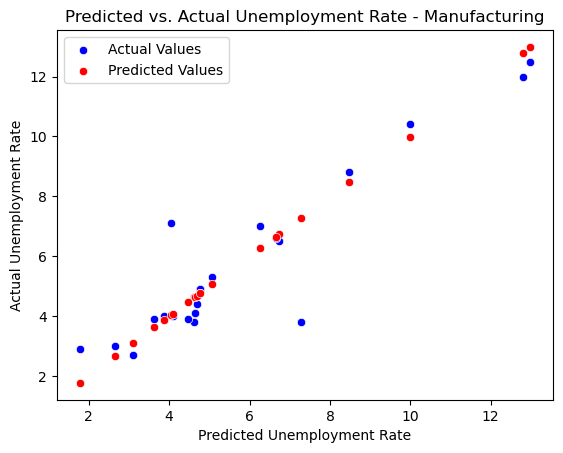

In [16]:
sns.scatterplot(x=y_pred_m, y=y_test_m, color='blue', label='Actual Values')
sns.scatterplot(x=y_pred_m, y=y_pred_m, color='red', label='Predicted Values')
plt.title("Predicted vs. Actual Unemployment Rate - Manufacturing")
plt.xlabel("Predicted Unemployment Rate")
plt.ylabel("Actual Unemployment Rate")
plt.legend()
plt.show()

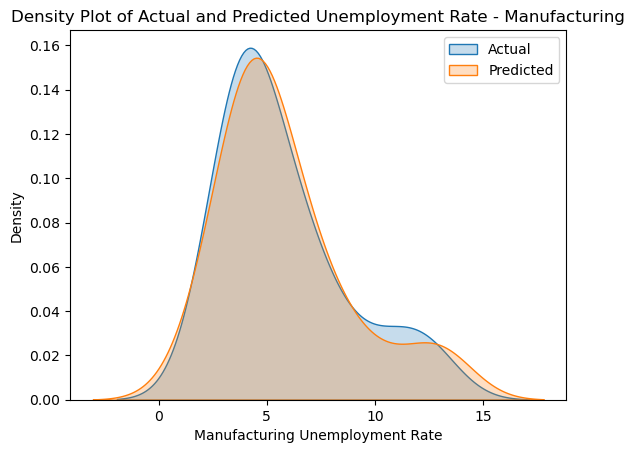

In [17]:
#DataFrame of actual and predicted values
results_m = pd.DataFrame({'Actual': y_test_m, 'Predicted': y_pred_m})

# Density plot
sns.kdeplot(data=results_m, x='Actual', label='Actual', shade=True)
sns.kdeplot(data=results_m, x='Predicted', label='Predicted', shade=True)
plt.xlabel('Manufacturing Unemployment Rate')
plt.title('Density Plot of Actual and Predicted Unemployment Rate - Manufacturing')
plt.legend()
plt.show()

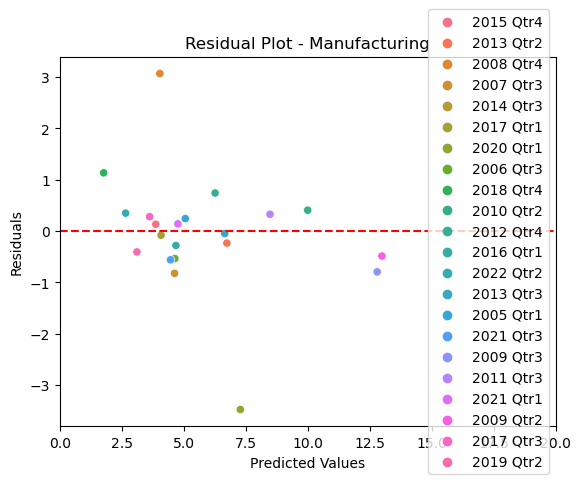

In [18]:
#Residual plot
residuals_m = y_test_m - y_pred_m
sns.scatterplot(x=y_pred_m, y=residuals_m, hue=X_test_m['Label'])
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot - Manufacturing')
plt.legend(loc='center right')
plt.xlim([0, 20])
plt.show()

# Finance 

In [19]:
#Finance - Train and test on part of dataset to get r2 score


X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(
    merged.drop('Finance_Unemployment_Rate', axis=1),
    merged['Finance_Unemployment_Rate'],
    test_size=0.3,
    stratify=merged['Year']
) 

# Define the preprocessing steps for the numerical and categorical columns
num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
]) 

# Combine the preprocessing steps using ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, ['SP500_Return', 'Percent_Change_in_GDP', 'CPI']),
    ('cat', cat_transformer, ['Year', 'Period'])
]) 

# Define the model as a pipeline of the preprocessor and a linear regression model
model_f = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
]) 

# Train the model on the training data
model_f.fit(X_train_f, y_train_f)

# Predict on the testing data
y_pred_f = model_f.predict(X_test_f)

# Evaluate the model
score_f = model_f.score(X_test_f, y_test_f)
print(f'R^2 score: {score_f}') 

print(y_pred_f)
len(X_train_f) 

R^2 score: 0.7811605401765425
[3.7583143  1.95020267 0.83213513 2.65410287 2.61860017 2.69102304
 6.53191869 4.87788191 2.32636208 2.67025845 4.55223008 6.68897177
 2.46363907 6.09978542 2.89110065 6.6094683  4.6364319  2.95332603
 2.10464474 4.9158421  2.29956681 3.5467477 ]


50

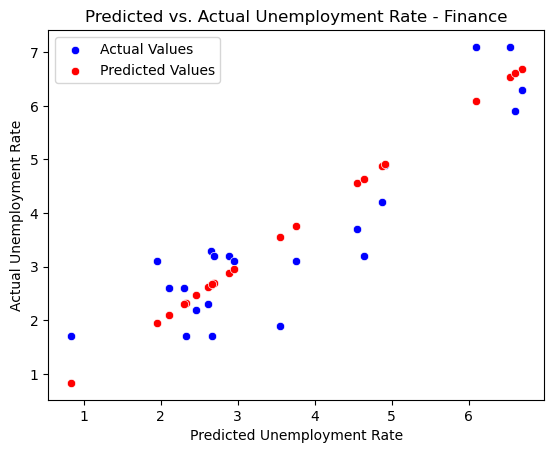

In [20]:
sns.scatterplot(x=y_pred_f, y=y_test_f, color='blue', label='Actual Values')
sns.scatterplot(x=y_pred_f, y=y_pred_f, color='red', label='Predicted Values')
plt.title("Predicted vs. Actual Unemployment Rate - Finance")
plt.xlabel("Predicted Unemployment Rate")
plt.ylabel("Actual Unemployment Rate")
plt.legend()
plt.show()

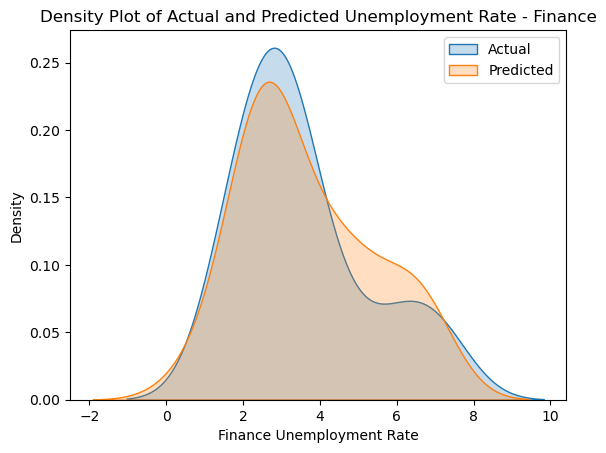

In [21]:
# Create a DataFrame of actual and predicted values
results_f = pd.DataFrame({'Actual': y_test_f, 'Predicted': y_pred_f})

# Density plot
sns.kdeplot(data=results_f, x='Actual', label='Actual', shade=True)
sns.kdeplot(data=results_f, x='Predicted', label='Predicted', shade=True)
plt.xlabel('Finance Unemployment Rate')
plt.title('Density Plot of Actual and Predicted Unemployment Rate - Finance')
plt.legend()
plt.show()

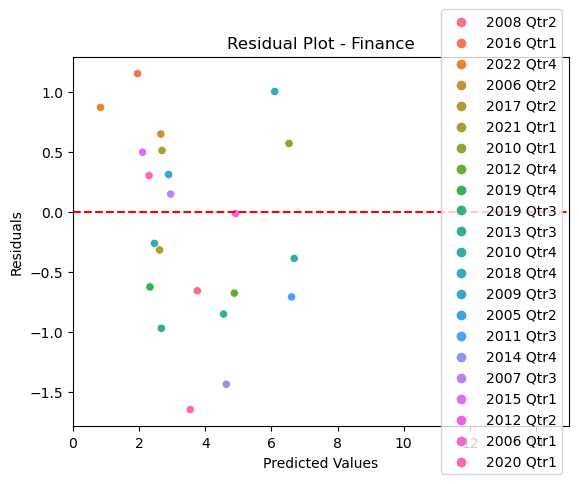

In [22]:
# Residual plot
residuals_f = y_test_f - y_pred_f
sns.scatterplot(x=y_pred_f, y=residuals_f, hue=X_test_f['Label'])
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot - Finance')
plt.legend(loc='center right')
plt.xlim([0, 15])
plt.show()

In [23]:
data_random_10 = pd.read_csv('inputs/data_random_10.csv')

In [24]:
#Construction - Train on ALL of the data for random testing

# Predict new random unemployment for construction

# Train the model on the training data
model_c.fit((merged.drop('Construction_Unemployment_Rate', axis=1)), merged['Construction_Unemployment_Rate'])

# Predict on the testing data
pred_random_c = model_c.predict(data_random_10)

data_random_10['Construction_Unemployment_Pred'] = pred_random_c

In [25]:
#Manufacturing - Train on ALL of the data for random testing

# Predict new random unemployment for construction

# Train the model on the training data
model_m.fit((merged.drop('Manufacturing_Unemployment_Rate', axis=1)), merged['Manufacturing_Unemployment_Rate'])

# Predict on the testing data
pred_random_m = model_m.predict(data_random_10)

data_random_10['Manufacturing_Unemployment_Pred'] = pred_random_m

In [26]:
#Finance - Train on ALL of the data for random testing

# Predict new random unemployment for construction

# Train the model on the training data
model_f.fit((merged.drop('Finance_Unemployment_Rate', axis=1)), merged['Finance_Unemployment_Rate'])

# Predict on the testing data
pred_random_f = model_f.predict(data_random_10)

data_random_10['Finance_Unemployment_Pred'] = pred_random_f

In [27]:
data_random_10

,Year,Period,SP500_Return,Percent_Change_in_GDP,CPI,Construction_Unemployment_Pred,Manufacturing_Unemployment_Pred,Finance_Unemployment_Pred
0,2023,Q01,-0.11,-16.40,244.45,10.435711,4.668614,2.917078
1,2023,Q02,0.06,-12.07,278.60,4.429094,0.957241,0.868267
2,2023,Q03,-0.01,-17.79,309.32,-0.924878,-2.931546,-0.895549
3,2023,Q04,0.13,11.02,285.51,2.849057,-0.919289,0.184602
4,2024,Q01,0.12,7.18,295.33,4.399392,-1.910117,-0.522986
5,2024,Q02,-0.07,3.85,213.16,11.461859,8.034791,4.861041
6,2024,Q03,-0.07,-17.40,283.26,2.044842,0.121932,0.749161
7,2024,Q04,0.13,5.61,311.66,-0.293390,-4.016736,-1.416162
8,2025,Q01,0.19,-5.67,292.09,5.681035,-0.606548,-0.206237
9,2025,Q02,0.16,2.85,264.84,6.216657,2.472501,1.594149
